# NBA Game Prediction Model Analysis

First part provides a comprehensive analysis and comparison of four NBA game prediction models:
1. **Logistic Regression** (Baseline)
2. **Basic Model** (Neural Network)
3. **Transformer**
4. **Transformer + TeamInfo**

We will analyze:
- Training and validation performance
- Overfitting behavior
- Convergence speed
- Training stability
- Learning dynamics
- Final rankings


## 1. Setup and Imports


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial']
plt.rcParams['axes.unicode_minus'] = False
sns.set_palette('husl')

# Set figure size default
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully")


✓ All libraries imported successfully


## 2. Data Loading Functions


In [ ]:
def merge_train_val_rows(df):
    train_df = df[df['train_acc'].notna()][['epoch', 'train_loss', 'train_acc']].copy()
    val_df = df[df['val_acc'].notna()][['epoch', 'val_loss', 'val_acc']].copy()
    merged_df = pd.merge(train_df, val_df, on='epoch', how='outer')
    merged_df = merged_df.sort_values('epoch').reset_index(drop=True)
    return merged_df

def load_all_data():
    data = {}

    # Logistic Regression
    lr_df = pd.read_csv('LR_results/baseline_logistic_training_history.csv')
    lr_df = lr_df[:77]  # Remove duplicates
    lr_df['epoch'] = lr_df['iterations']
    data['Logistic Regression'] = lr_df

    # Basic Model
    basic_df = pd.read_csv('logs/nba_game_prediction/default/metrics.csv')
    data['Basic Model'] = merge_train_val_rows(basic_df)

    # Transformer
    trans_df = pd.read_csv('logs/nba_transformer/transformer_default/metrics.csv')
    data['Transformer'] = merge_train_val_rows(trans_df)

    # Transformer + TeamInfo
    trans_ti_df = pd.read_csv('logs/nba_transformer_with_teaminfo/transformer_with_teaminfo_default/metrics.csv')
    data['Transformer+TeamInfo'] = merge_train_val_rows(trans_ti_df)

    return data

print("✓ Data loading functions defined")


✓ Data loading functions defined


## 3. Load All Model Data


In [17]:
print("Loading data from all models...\n")
data = load_all_data()

# Display data summary
print(f"Loaded {len(data)} models:\n")
for name, df in data.items():
    print(f"  - {name}: {len(df)} epochs/iterations")
    print(f"    Final Train Acc: {df['train_acc'].iloc[-1]:.4f}")
    print(f"    Final Val Acc: {df['val_acc'].iloc[-1]:.4f}")
    print()


Loading data from all models...

Loaded 4 models:

  - Logistic Regression: 77 epochs/iterations
    Final Train Acc: 0.6589
    Final Val Acc: 0.6426

  - Basic Model: 100 epochs/iterations
    Final Train Acc: 0.6511
    Final Val Acc: 0.6564

  - Transformer: 100 epochs/iterations
    Final Train Acc: 0.6630
    Final Val Acc: 0.6672

  - Transformer+TeamInfo: 100 epochs/iterations
    Final Train Acc: 0.6559
    Final Val Acc: 0.6641



## 4. Basic Training Curves Comparison

First, let's visualize the basic training and validation curves for all four models.


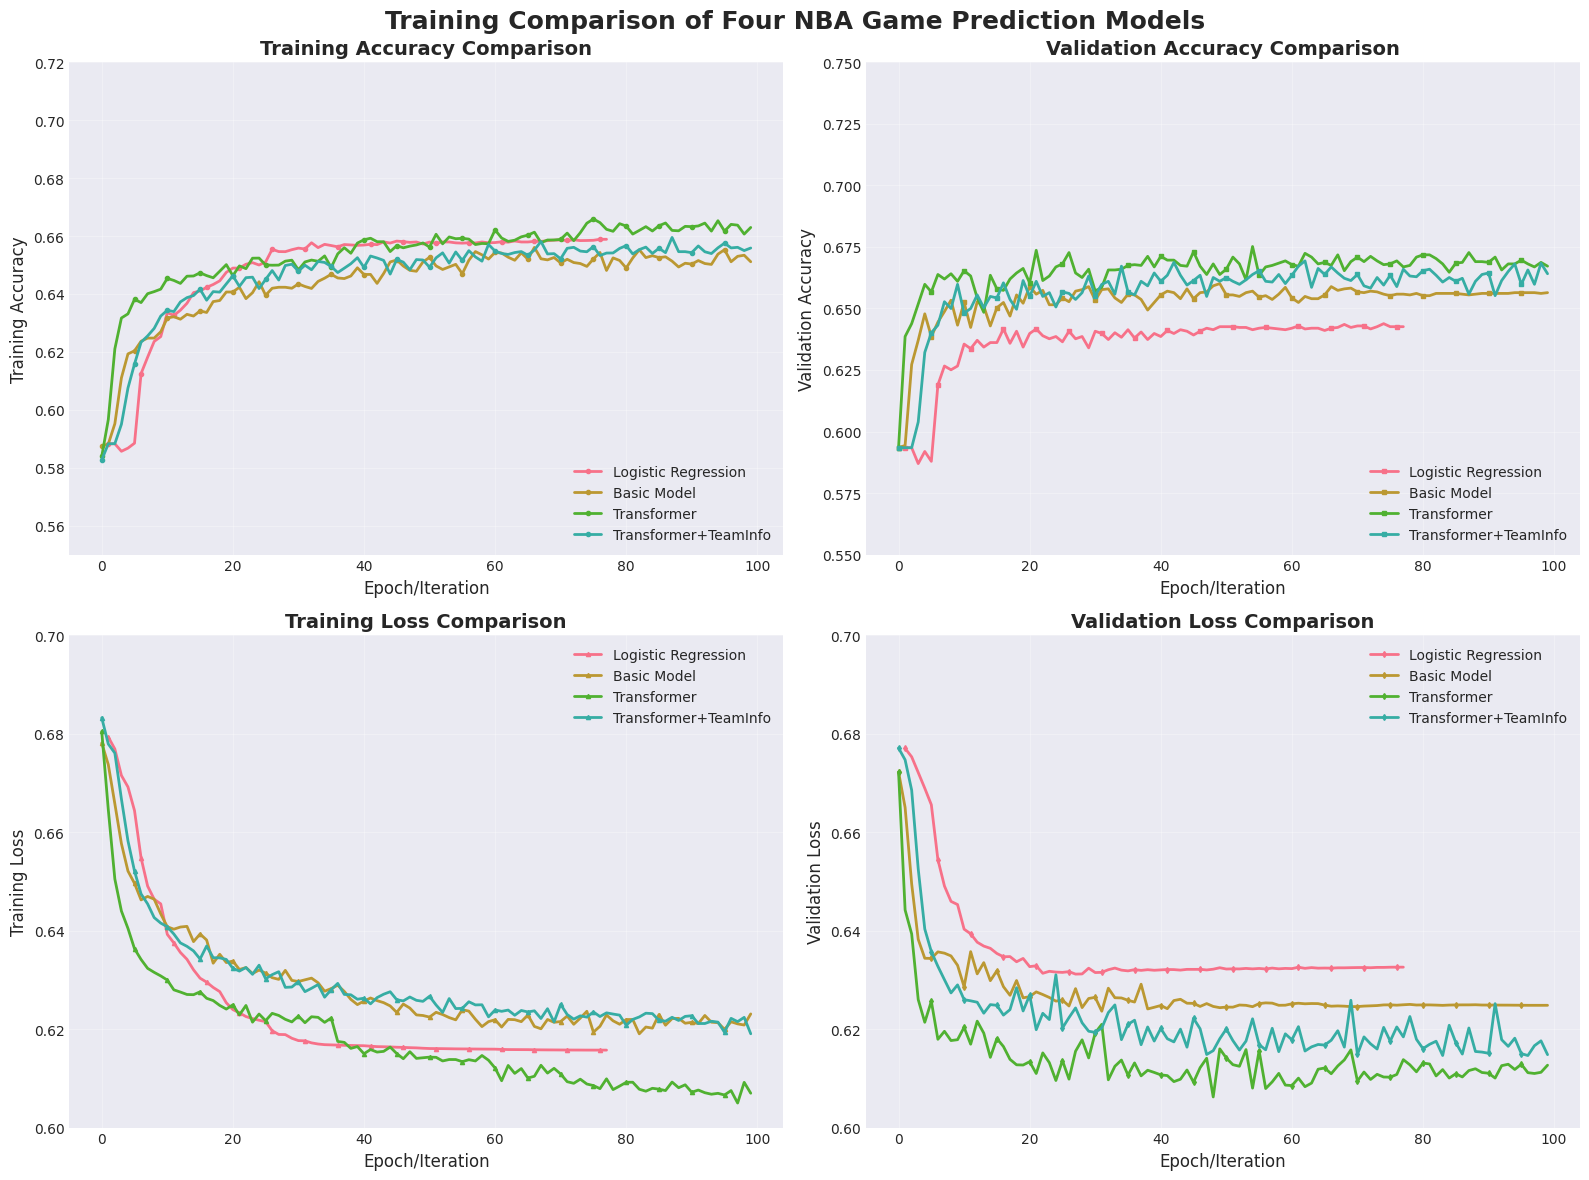

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Training Comparison of Four NBA Game Prediction Models', fontsize=18, fontweight='bold')

# Training Accuracy Comparison
ax1 = axes[0, 0]
for name, df in data.items():
    ax1.plot(df['epoch'], df['train_acc'], label=name, linewidth=2, marker='o', markersize=3, markevery=5)
ax1.set_xlabel('Epoch/Iteration', fontsize=12)
ax1.set_ylabel('Training Accuracy', fontsize=12)
ax1.set_title('Training Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0.55, 0.72])

# Validation Accuracy Comparison
ax2 = axes[0, 1]
for name, df in data.items():
    ax2.plot(df['epoch'], df['val_acc'], label=name, linewidth=2, marker='s', markersize=3, markevery=5)
ax2.set_xlabel('Epoch/Iteration', fontsize=12)
ax2.set_ylabel('Validation Accuracy', fontsize=12)
ax2.set_title('Validation Accuracy Comparison', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0.55, 0.75])

# Training Loss Comparison
ax3 = axes[1, 0]
for name, df in data.items():
    ax3.plot(df['epoch'], df['train_loss'], label=name, linewidth=2, marker='^', markersize=3, markevery=5)
ax3.set_xlabel('Epoch/Iteration', fontsize=12)
ax3.set_ylabel('Training Loss', fontsize=12)
ax3.set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
ax3.legend(loc='upper right', fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0.60, 0.70])

# Validation Loss Comparison
ax4 = axes[1, 1]
for name, df in data.items():
    ax4.plot(df['epoch'], df['val_loss'], label=name, linewidth=2, marker='d', markersize=3, markevery=5)
ax4.set_xlabel('Epoch/Iteration', fontsize=12)
ax4.set_ylabel('Validation Loss', fontsize=12)
ax4.set_title('Validation Loss Comparison', fontsize=14, fontweight='bold')
ax4.legend(loc='upper right', fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.set_ylim([0.60, 0.70])

plt.tight_layout()
plt.show()


### Final Performance Summary


In [19]:
print("\n" + "="*80)
print("Final Performance Comparison")
print("="*80)

final_results = []
for name, df in data.items():
    final = df.iloc[-1]
    final_results.append({
        'Model': name,
        'Train Acc': f"{final['train_acc']:.4f}",
        'Val Acc': f"{final['val_acc']:.4f}",
        'Val Loss': f"{final['val_loss']:.4f}"
    })

final_df = pd.DataFrame(final_results)
print(final_df.to_string(index=False))

print("\n" + "="*80)
print("Best Validation Accuracy Achieved")
print("="*80)

for name, df in data.items():
    best_acc = df['val_acc'].max()
    best_epoch = df.loc[df['val_acc'].idxmax(), 'epoch']
    print(f"{name}: {best_acc:.4f} (Epoch {int(best_epoch)})")

print("="*80)



Final Performance Comparison
               Model Train Acc Val Acc Val Loss
 Logistic Regression    0.6589  0.6426   0.6326
         Basic Model    0.6511  0.6564   0.6248
         Transformer    0.6630  0.6672   0.6127
Transformer+TeamInfo    0.6559  0.6641   0.6148

Best Validation Accuracy Achieved
Logistic Regression: 0.6438 (Epoch 74)
Basic Model: 0.6601 (Epoch 49)
Transformer: 0.6752 (Epoch 54)
Transformer+TeamInfo: 0.6693 (Epoch 62)


## 5. Overfitting Analysis

Analyzing the train-validation gap to detect overfitting behavior.


OVERFITTING ANALYSIS

Logistic Regression:
  Final Accuracy Gap (Train-Val): 0.0163
  Final Loss Gap (Val-Train): 0.0169
  Max Accuracy Gap: 0.0213
  Overfitting Trend: Increasing

Basic Model:
  Final Accuracy Gap (Train-Val): -0.0053
  Final Loss Gap (Val-Train): 0.0018
  Max Accuracy Gap: 0.0017
  Overfitting Trend: Increasing

Transformer:
  Final Accuracy Gap (Train-Val): -0.0042
  Final Loss Gap (Val-Train): 0.0057
  Max Accuracy Gap: -0.0012
  Overfitting Trend: Increasing

Transformer+TeamInfo:
  Final Accuracy Gap (Train-Val): -0.0082
  Final Loss Gap (Val-Train): -0.0042
  Max Accuracy Gap: 0.0037
  Overfitting Trend: Increasing


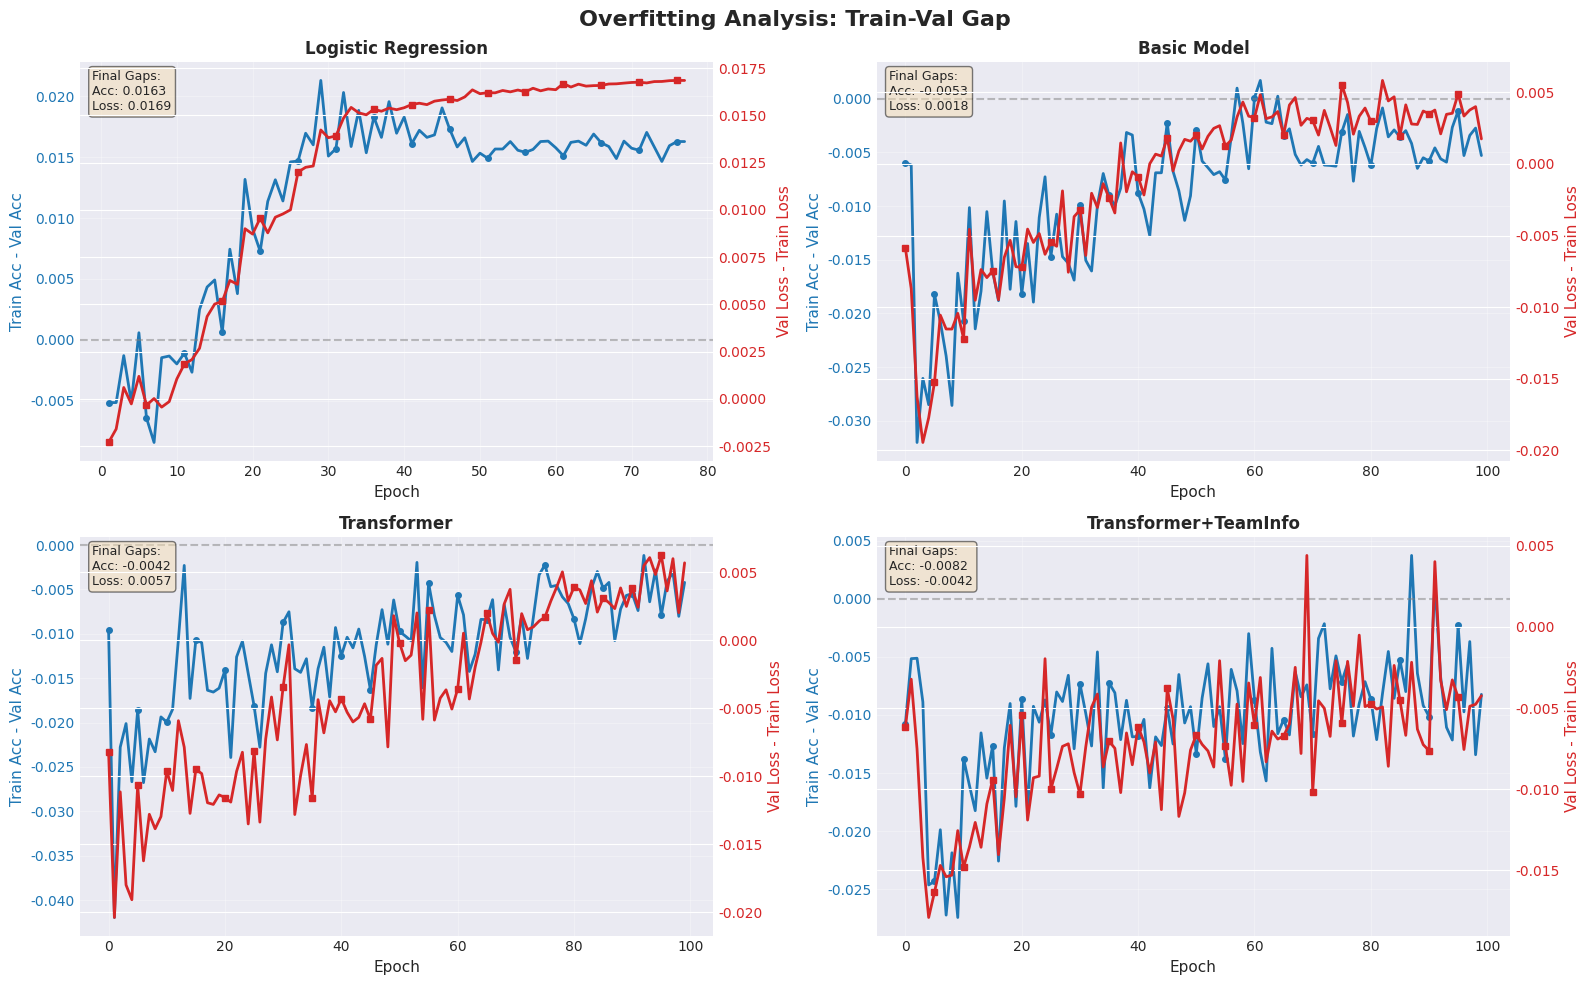

In [20]:
print("="*80)
print("OVERFITTING ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Overfitting Analysis: Train-Val Gap', fontsize=16, fontweight='bold')

colors = plt.cm.tab10(np.linspace(0, 1, 4))

for idx, (name, df) in enumerate(data.items()):
    ax = axes[idx // 2, idx % 2]

    # Calculate gaps
    acc_gap = df['train_acc'] - df['val_acc']
    loss_gap = df['val_loss'] - df['train_loss']

    # Plot
    ax2 = ax.twinx()
    line1 = ax.plot(df['epoch'], acc_gap, 'o-', label='Accuracy Gap',
                    color=colors[0], linewidth=2, markersize=4, markevery=5)
    line2 = ax2.plot(df['epoch'], loss_gap, 's-', label='Loss Gap',
                     color=colors[1], linewidth=2, markersize=4, markevery=5)

    ax.set_xlabel('Epoch', fontsize=11)
    ax.set_ylabel('Train Acc - Val Acc', fontsize=11, color=colors[0])
    ax2.set_ylabel('Val Loss - Train Loss', fontsize=11, color=colors[1])
    ax.set_title(f'{name}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='y', labelcolor=colors[0])
    ax2.tick_params(axis='y', labelcolor=colors[1])

    # Add reference line at 0
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

    # Calculate final gap
    final_acc_gap = acc_gap.iloc[-1]
    final_loss_gap = loss_gap.iloc[-1]

    # Add text box with statistics
    textstr = f'Final Gaps:\nAcc: {final_acc_gap:.4f}\nLoss: {final_loss_gap:.4f}'
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Print statistics
    print(f"\n{name}:")
    print(f"  Final Accuracy Gap (Train-Val): {final_acc_gap:.4f}")
    print(f"  Final Loss Gap (Val-Train): {final_loss_gap:.4f}")
    print(f"  Max Accuracy Gap: {acc_gap.max():.4f}")
    print(f"  Overfitting Trend: {'Increasing' if acc_gap.iloc[-1] > acc_gap.iloc[10] else 'Stable/Decreasing'}")

plt.tight_layout()
plt.show()


## 6. Convergence Analysis

Analyzing convergence speed and how quickly models reach accuracy milestones.


CONVERGENCE ANALYSIS


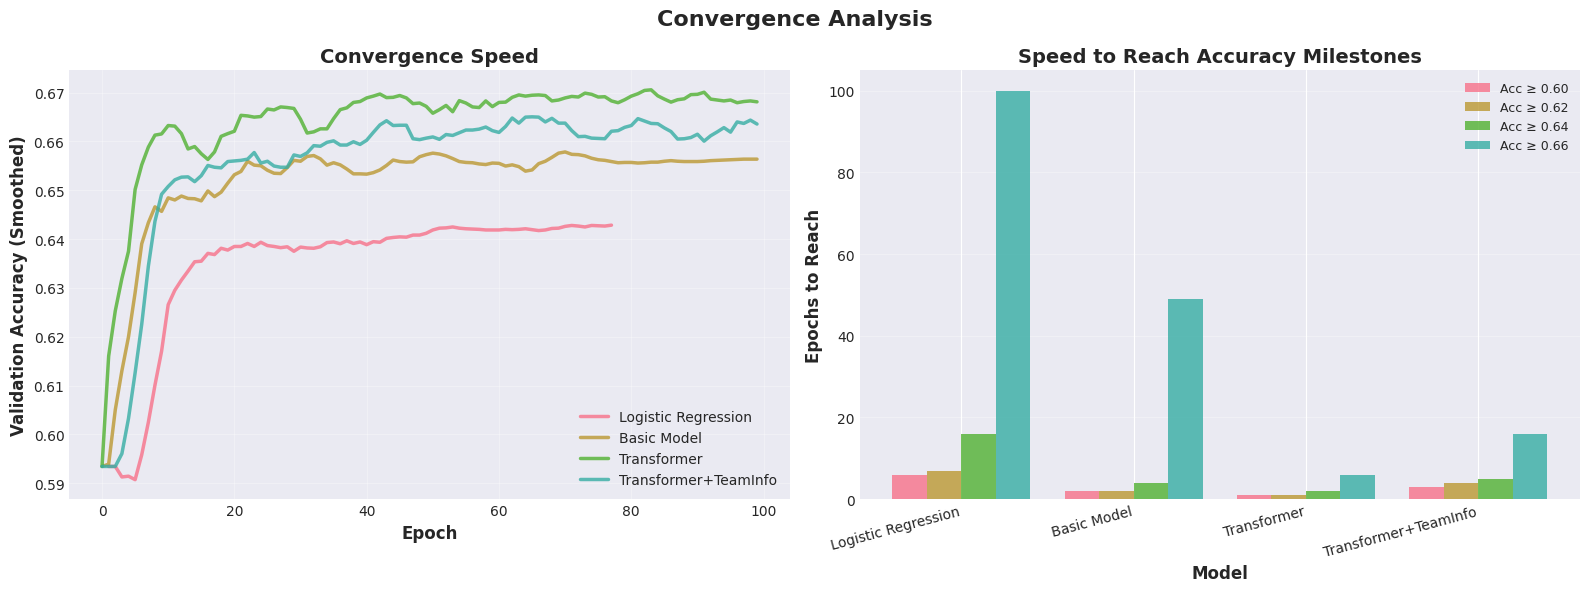


Logistic Regression:
  Epochs to reach 60% acc: 6
  Improvement in first 10 epochs: 0.0421

Basic Model:
  Epochs to reach 60% acc: 2
  Improvement in first 10 epochs: 0.0498

Transformer:
  Epochs to reach 60% acc: 1
  Improvement in first 10 epochs: 0.0676

Transformer+TeamInfo:
  Epochs to reach 60% acc: 3
  Improvement in first 10 epochs: 0.0664


In [21]:
print("="*80)
print("CONVERGENCE ANALYSIS")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Convergence Analysis', fontsize=16, fontweight='bold')

# Left: Validation accuracy improvement rate
ax1 = axes[0]
for name, df in data.items():
    val_acc = df['val_acc'].values
    # Calculate moving average to smooth
    window = 5
    smoothed = pd.Series(val_acc).rolling(window=window, min_periods=1).mean()
    ax1.plot(df['epoch'], smoothed, label=name, linewidth=2.5, alpha=0.8)

ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Validation Accuracy (Smoothed)', fontsize=12, fontweight='bold')
ax1.set_title('Convergence Speed', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Right: Learning rate (epochs to reach certain accuracy)
ax2 = axes[1]
milestones = [0.60, 0.62, 0.64, 0.66]
x_pos = np.arange(len(data))
width = 0.2

for i, milestone in enumerate(milestones):
    epochs_to_reach = []
    for name, df in data.items():
        epochs = df[df['val_acc'] >= milestone]['epoch'].values
        if len(epochs) > 0:
            epochs_to_reach.append(epochs[0])
        else:
            epochs_to_reach.append(100)  # Didn't reach

    ax2.bar(x_pos + i * width, epochs_to_reach, width, label=f'Acc ≥ {milestone:.2f}', alpha=0.8)

ax2.set_xlabel('Model', fontsize=12, fontweight='bold')
ax2.set_ylabel('Epochs to Reach', fontsize=12, fontweight='bold')
ax2.set_title('Speed to Reach Accuracy Milestones', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos + width * 1.5)
ax2.set_xticklabels(data.keys(), rotation=15, ha='right')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print statistics
for name, df in data.items():
    print(f"\n{name}:")
    val_acc = df['val_acc'].values
    # Epochs to reach 60% accuracy
    epoch_60 = df[df['val_acc'] >= 0.60]['epoch'].values
    if len(epoch_60) > 0:
        print(f"  Epochs to reach 60% acc: {epoch_60[0]:.0f}")
    else:
        print(f"  Epochs to reach 60% acc: >100")

    # Improvement in first 10 epochs
    if len(val_acc) >= 10:
        improvement = val_acc[9] - val_acc[0]
        print(f"  Improvement in first 10 epochs: {improvement:.4f}")


## 7. Training Stability Analysis

Analyzing variance and oscillation during training to evaluate stability.


TRAINING STABILITY ANALYSIS

Logistic Regression:
  Avg Val Acc Std (last 20 epochs): 0.000573
  Avg Val Loss Std (last 20 epochs): 0.000076
  Stability Score (lower is better): 0.000573

Basic Model:
  Avg Val Acc Std (last 20 epochs): 0.000340
  Avg Val Loss Std (last 20 epochs): 0.000044
  Stability Score (lower is better): 0.000340

Transformer:
  Avg Val Acc Std (last 20 epochs): 0.001989
  Avg Val Loss Std (last 20 epochs): 0.001082
  Stability Score (lower is better): 0.001989

Transformer+TeamInfo:
  Avg Val Acc Std (last 20 epochs): 0.003102
  Avg Val Loss Std (last 20 epochs): 0.002703
  Stability Score (lower is better): 0.003102


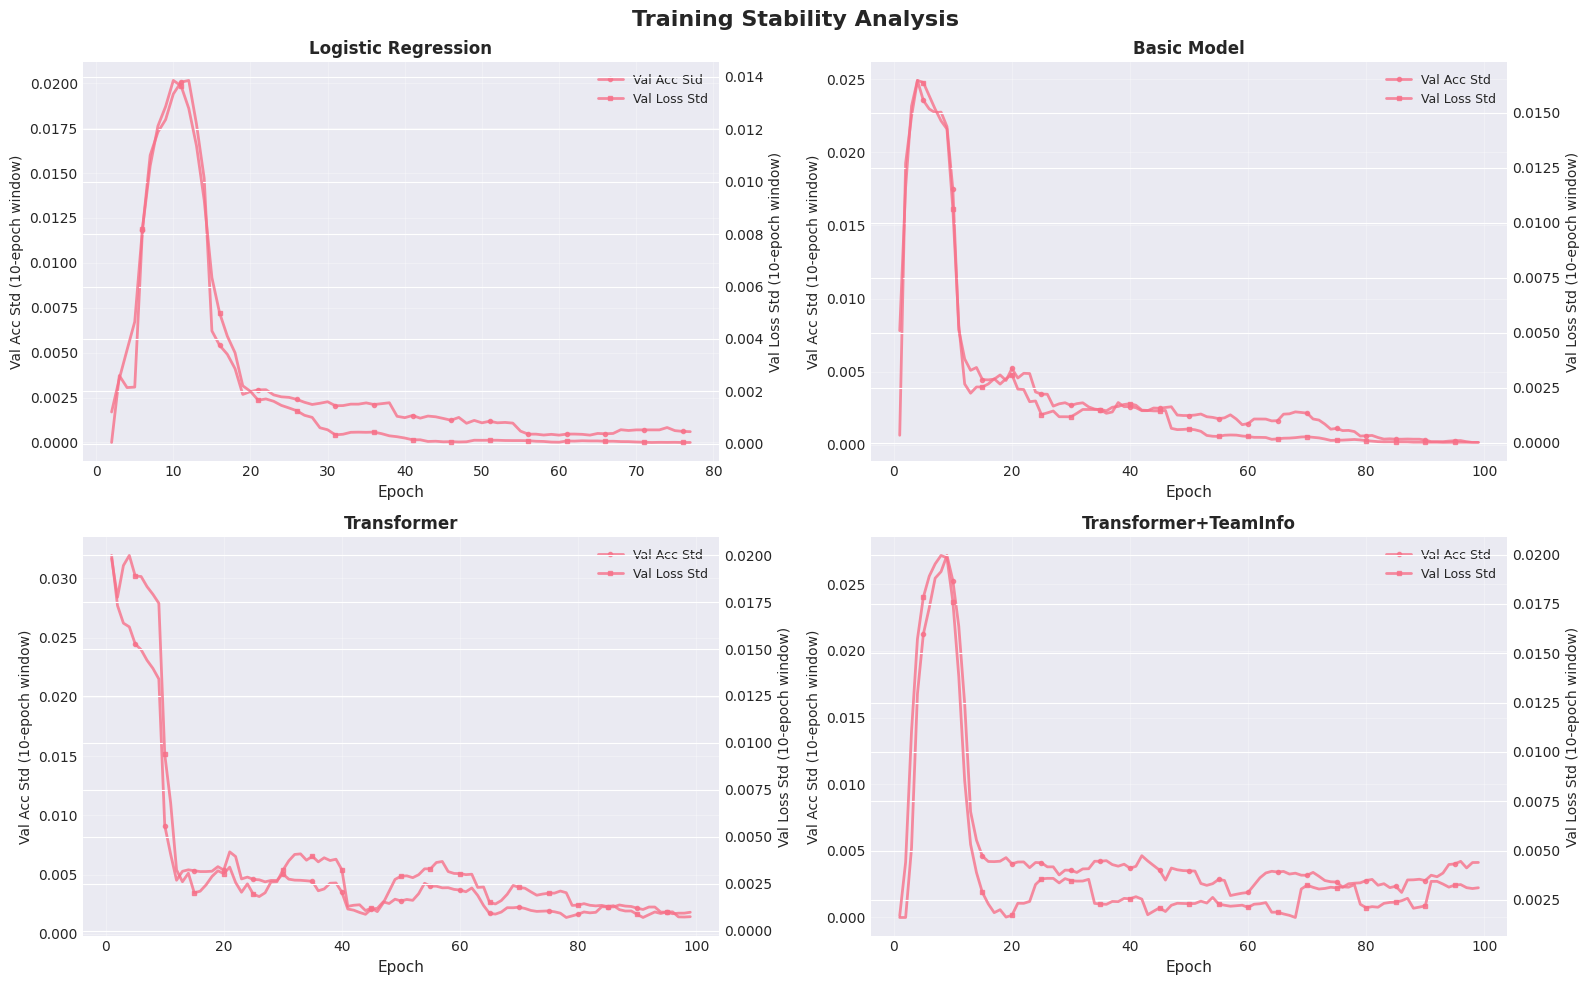

In [22]:
print("="*80)
print("TRAINING STABILITY ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Training Stability Analysis', fontsize=16, fontweight='bold')

for idx, (name, df) in enumerate(data.items()):
    ax = axes[idx // 2, idx % 2]

    # Calculate rolling standard deviation (volatility)
    window = 10
    val_acc_std = df['val_acc'].rolling(window=window, min_periods=1).std()
    val_loss_std = df['val_loss'].rolling(window=window, min_periods=1).std()

    ax2 = ax.twinx()
    line1 = ax.plot(df['epoch'], val_acc_std, 'o-', label='Val Acc Std',
                    linewidth=2, markersize=3, markevery=5, alpha=0.8)
    line2 = ax2.plot(df['epoch'], val_loss_std, 's-', label='Val Loss Std',
                     linewidth=2, markersize=3, markevery=5, alpha=0.8)

    ax.set_xlabel('Epoch', fontsize=11)
    ax.set_ylabel('Val Acc Std (10-epoch window)', fontsize=10)
    ax2.set_ylabel('Val Loss Std (10-epoch window)', fontsize=10)
    ax.set_title(f'{name}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # Add legend
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax.legend(lines, labels, loc='upper right', fontsize=9)

    # Print statistics
    print(f"\n{name}:")
    print(f"  Avg Val Acc Std (last 20 epochs): {val_acc_std.iloc[-20:].mean():.6f}")
    print(f"  Avg Val Loss Std (last 20 epochs): {val_loss_std.iloc[-20:].mean():.6f}")
    print(f"  Stability Score (lower is better): {val_acc_std.iloc[-20:].mean():.6f}")

plt.tight_layout()
plt.show()


## 8. Comprehensive Performance Summary

Creating a comprehensive table and visualization comparing all performance metrics.


In [23]:
print("="*80)
print("COMPREHENSIVE PERFORMANCE SUMMARY")
print("="*80)

summary = []

for name, df in data.items():
    metrics = {
        'Model': name,
        'Best Val Acc': df['val_acc'].max(),
        'Best Val Acc Epoch': df.loc[df['val_acc'].idxmax(), 'epoch'],
        'Final Val Acc': df['val_acc'].iloc[-1],
        'Best Val Loss': df['val_loss'].min(),
        'Final Val Loss': df['val_loss'].iloc[-1],
        'Final Train Acc': df['train_acc'].iloc[-1],
        'Overfit Gap': df['train_acc'].iloc[-1] - df['val_acc'].iloc[-1],
        'Acc Improvement': df['val_acc'].iloc[-1] - df['val_acc'].iloc[0],
    }
    summary.append(metrics)

summary_df = pd.DataFrame(summary)

# Print table
print("\n" + summary_df.to_string(index=False))

# Display the summary
print()


COMPREHENSIVE PERFORMANCE SUMMARY

               Model  Best Val Acc  Best Val Acc Epoch  Final Val Acc  Best Val Loss  Final Val Loss  Final Train Acc  Overfit Gap  Acc Improvement
 Logistic Regression      0.643823                74.0       0.642594       0.631179        0.632591         0.658881     0.016288         0.049170
         Basic Model      0.660111                49.0       0.656423       0.623634        0.624842         0.651130    -0.005293         0.062999
         Transformer      0.675169                54.0       0.667179       0.606223        0.612678         0.662979    -0.004200         0.073755
Transformer+TeamInfo      0.669330                62.0       0.664106       0.614639        0.614816         0.655877    -0.008229         0.070682



### Performance Metrics Visualization


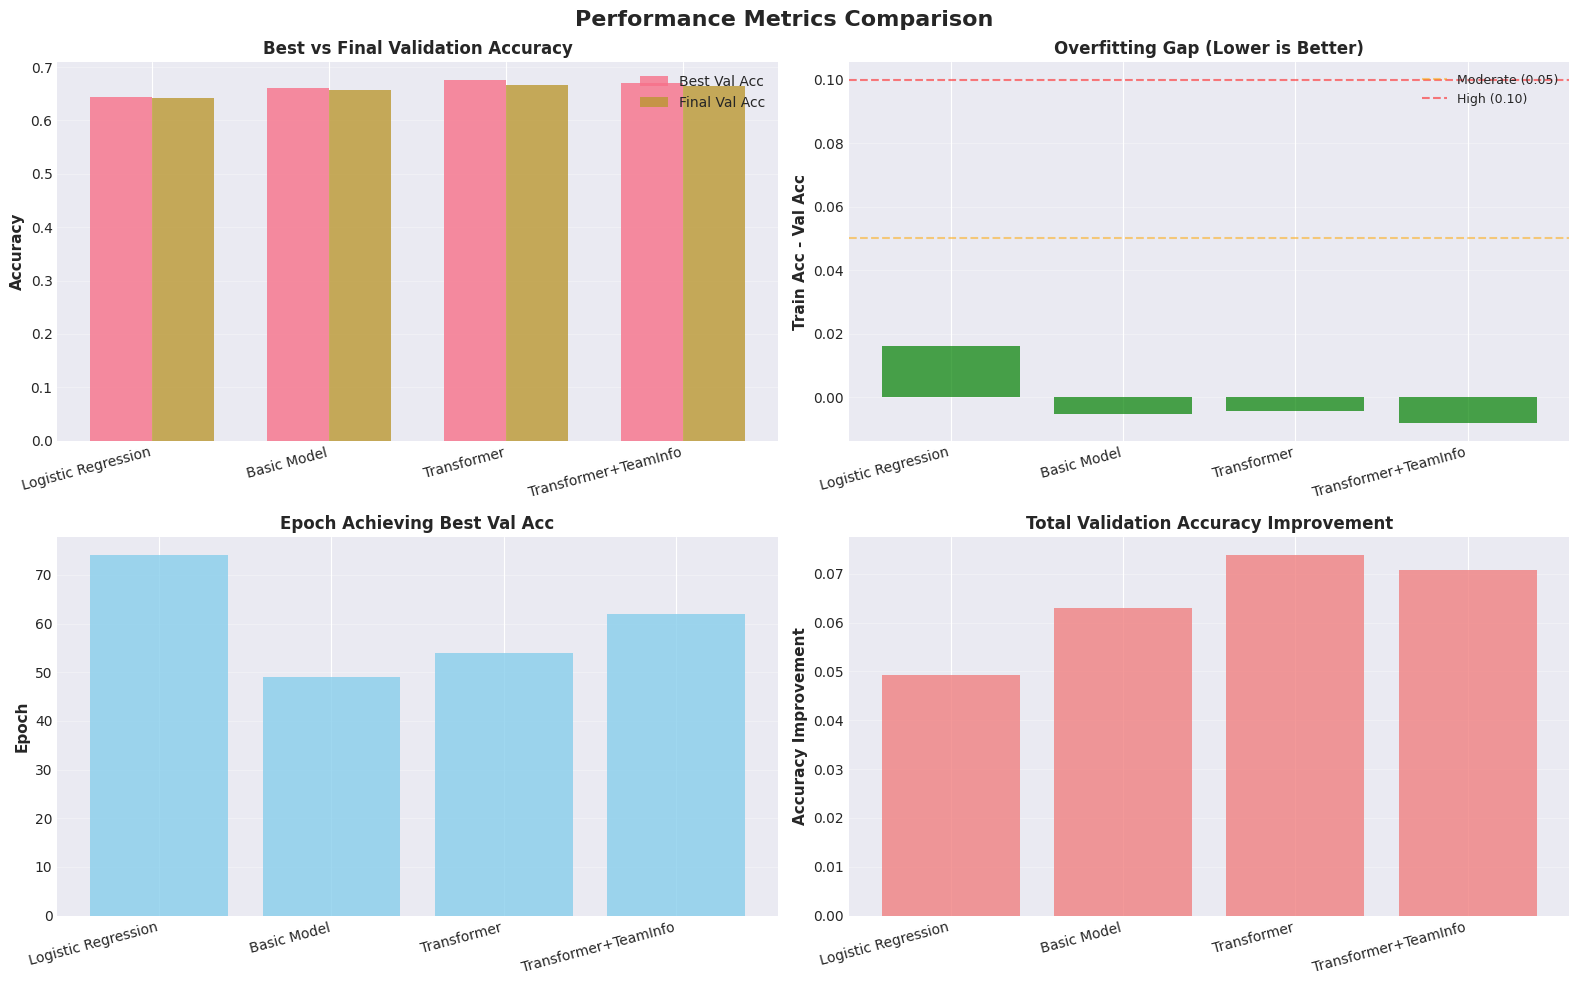

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Performance Metrics Comparison', fontsize=16, fontweight='bold')

models = summary_df['Model'].values
x_pos = np.arange(len(models))

# 1. Best vs Final Validation Accuracy
ax1 = axes[0, 0]
width = 0.35
ax1.bar(x_pos - width/2, summary_df['Best Val Acc'], width, label='Best Val Acc', alpha=0.8)
ax1.bar(x_pos + width/2, summary_df['Final Val Acc'], width, label='Final Val Acc', alpha=0.8)
ax1.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Best vs Final Validation Accuracy', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models, rotation=15, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2. Overfitting Gap
ax2 = axes[0, 1]
colors_bar = ['green' if x < 0.05 else 'orange' if x < 0.10 else 'red' for x in summary_df['Overfit Gap']]
ax2.bar(x_pos, summary_df['Overfit Gap'], color=colors_bar, alpha=0.7)
ax2.set_ylabel('Train Acc - Val Acc', fontsize=11, fontweight='bold')
ax2.set_title('Overfitting Gap (Lower is Better)', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models, rotation=15, ha='right')
ax2.axhline(y=0.05, color='orange', linestyle='--', alpha=0.5, label='Moderate (0.05)')
ax2.axhline(y=0.10, color='red', linestyle='--', alpha=0.5, label='High (0.10)')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Best Epoch
ax3 = axes[1, 0]
ax3.bar(x_pos, summary_df['Best Val Acc Epoch'], alpha=0.8, color='skyblue')
ax3.set_ylabel('Epoch', fontsize=11, fontweight='bold')
ax3.set_title('Epoch Achieving Best Val Acc', fontsize=12, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(models, rotation=15, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Accuracy Improvement
ax4 = axes[1, 1]
ax4.bar(x_pos, summary_df['Acc Improvement'], alpha=0.8, color='lightcoral')
ax4.set_ylabel('Accuracy Improvement', fontsize=11, fontweight='bold')
ax4.set_title('Total Validation Accuracy Improvement', fontsize=12, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(models, rotation=15, ha='right')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 9. Learning Dynamics Analysis

Analyzing the rate of improvement over time to understand learning patterns.


LEARNING DYNAMICS ANALYSIS

Logistic Regression:
  Avg improvement rate (first 10 epochs): 0.00403
  Avg improvement rate (last 10 epochs): 0.00003
  Total epochs with improvement: 35
  Total epochs with decline: 32

Basic Model:
  Avg improvement rate (first 10 epochs): 0.00590
  Avg improvement rate (last 10 epochs): 0.00003
  Total epochs with improvement: 47
  Total epochs with decline: 37

Transformer:
  Avg improvement rate (first 10 epochs): 0.00719
  Avg improvement rate (last 10 epochs): -0.00018
  Total epochs with improvement: 51
  Total epochs with decline: 43

Transformer+TeamInfo:
  Avg improvement rate (first 10 epochs): 0.00547
  Avg improvement rate (last 10 epochs): 0.00003
  Total epochs with improvement: 52
  Total epochs with decline: 45


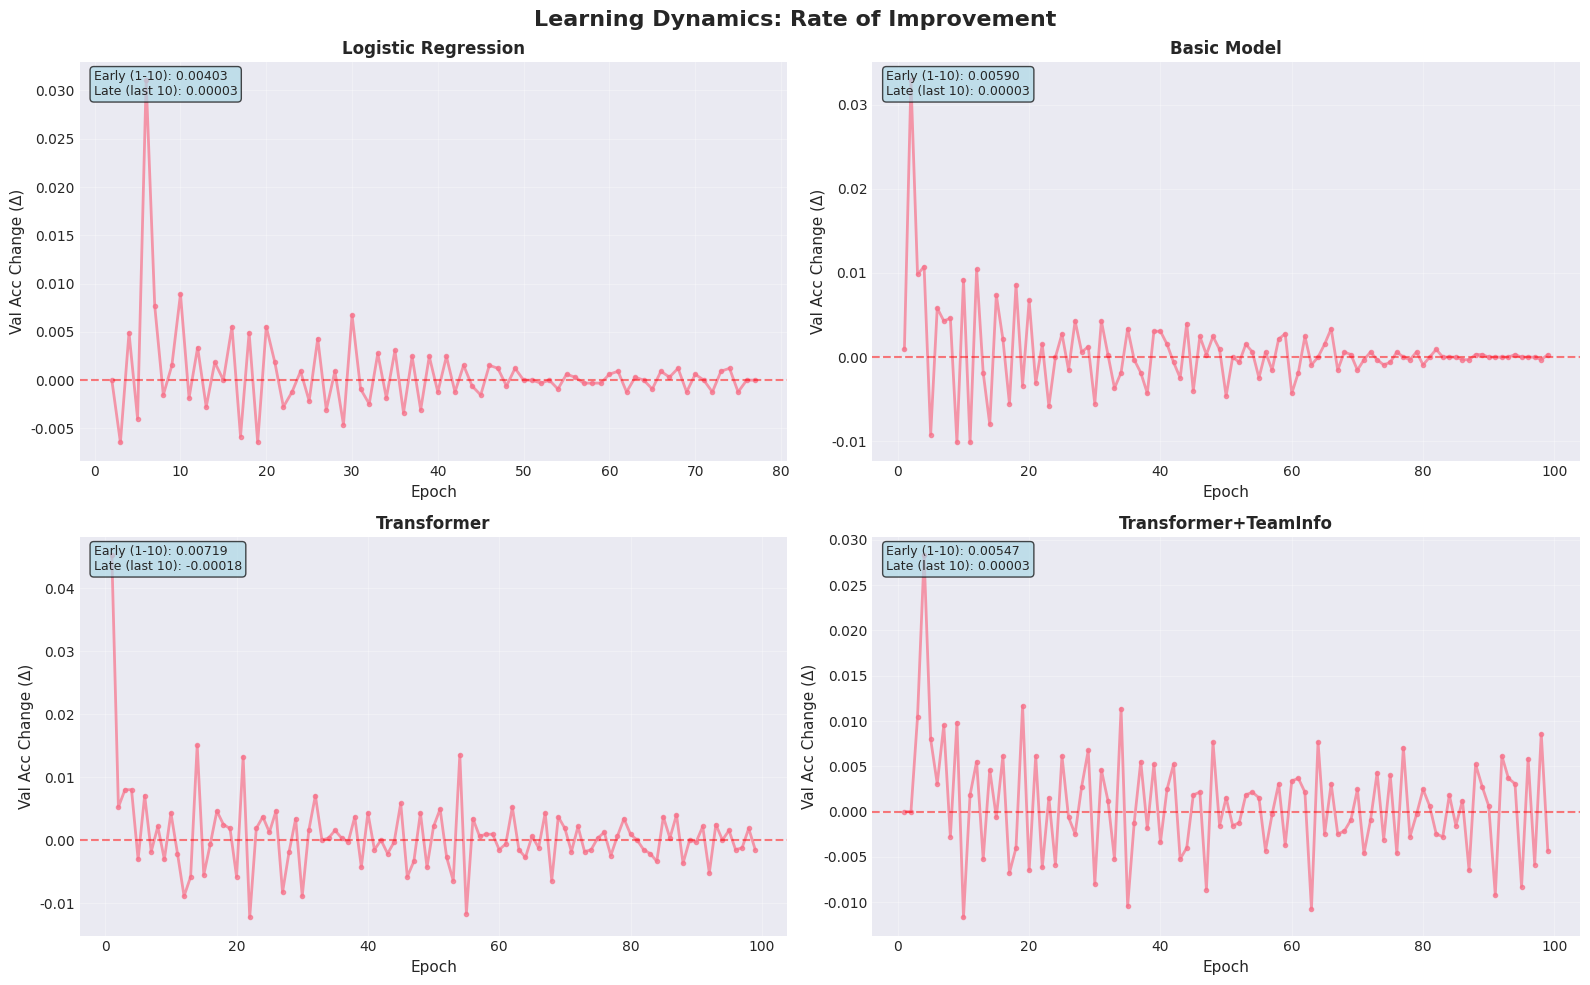

In [25]:
print("="*80)
print("LEARNING DYNAMICS ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Learning Dynamics: Rate of Improvement', fontsize=16, fontweight='bold')

for idx, (name, df) in enumerate(data.items()):
    ax = axes[idx // 2, idx % 2]

    # Calculate gradient (rate of change) of validation accuracy
    val_acc_diff = df['val_acc'].diff()

    # Plot
    ax.plot(df['epoch'].iloc[1:], val_acc_diff.iloc[1:], 'o-', linewidth=2, markersize=3, alpha=0.7)
    ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)

    ax.set_xlabel('Epoch', fontsize=11)
    ax.set_ylabel('Val Acc Change (Δ)', fontsize=11)
    ax.set_title(f'{name}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # Add statistics
    avg_improvement_early = val_acc_diff.iloc[1:11].mean()
    avg_improvement_late = val_acc_diff.iloc[-10:].mean()

    textstr = f'Early (1-10): {avg_improvement_early:.5f}\nLate (last 10): {avg_improvement_late:.5f}'
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

    print(f"\n{name}:")
    print(f"  Avg improvement rate (first 10 epochs): {avg_improvement_early:.5f}")
    print(f"  Avg improvement rate (last 10 epochs): {avg_improvement_late:.5f}")
    print(f"  Total epochs with improvement: {(val_acc_diff > 0).sum()}")
    print(f"  Total epochs with decline: {(val_acc_diff < 0).sum()}")

plt.tight_layout()
plt.show()


## 10. Model Ranking by Different Criteria

Ranking models based on various performance criteria.


In [26]:
print("="*80)
print("MODEL RANKING BY DIFFERENT CRITERIA")
print("="*80)

criteria = []

for name, df in data.items():
    # Calculate various metrics
    best_val_acc = df['val_acc'].max()
    final_val_acc = df['val_acc'].iloc[-1]
    best_val_loss = df['val_loss'].min()
    final_val_loss = df['val_loss'].iloc[-1]
    overfit_gap = df['train_acc'].iloc[-1] - df['val_acc'].iloc[-1]
    val_acc_std = df['val_acc'].rolling(window=10).std().iloc[-10:].mean()

    criteria.append({
        'Model': name,
        'Best Val Acc': best_val_acc,
        'Final Val Acc': final_val_acc,
        'Best Val Loss': best_val_loss,
        'Final Val Loss': final_val_loss,
        'Overfit Gap': overfit_gap,
        'Stability': val_acc_std,
    })

df_rank = pd.DataFrame(criteria)

print("\n### Ranking by Best Validation Accuracy ###")
ranked_best = df_rank.sort_values('Best Val Acc', ascending=False)
for i, (idx, row) in enumerate(ranked_best.iterrows(), 1):
    print(f"{i}. {row['Model']}: {row['Best Val Acc']:.4f}")

print("\n### Ranking by Final Validation Accuracy ###")
ranked_final = df_rank.sort_values('Final Val Acc', ascending=False)
for i, (idx, row) in enumerate(ranked_final.iterrows(), 1):
    print(f"{i}. {row['Model']}: {row['Final Val Acc']:.4f}")

print("\n### Ranking by Generalization (Lower Overfit Gap) ###")
ranked_gen = df_rank.sort_values('Overfit Gap', ascending=True)
for i, (idx, row) in enumerate(ranked_gen.iterrows(), 1):
    print(f"{i}. {row['Model']}: {row['Overfit Gap']:.4f}")

print("\n### Ranking by Stability (Lower Variance) ###")
ranked_stab = df_rank.sort_values('Stability', ascending=True)
for i, (idx, row) in enumerate(ranked_stab.iterrows(), 1):
    print(f"{i}. {row['Model']}: {row['Stability']:.6f}")


MODEL RANKING BY DIFFERENT CRITERIA

### Ranking by Best Validation Accuracy ###
1. Transformer: 0.6752
2. Transformer+TeamInfo: 0.6693
3. Basic Model: 0.6601
4. Logistic Regression: 0.6438

### Ranking by Final Validation Accuracy ###
1. Transformer: 0.6672
2. Transformer+TeamInfo: 0.6641
3. Basic Model: 0.6564
4. Logistic Regression: 0.6426

### Ranking by Generalization (Lower Overfit Gap) ###
1. Transformer+TeamInfo: -0.0082
2. Basic Model: -0.0053
3. Transformer: -0.0042
4. Logistic Regression: 0.0163

### Ranking by Stability (Lower Variance) ###
1. Basic Model: 0.000232
2. Logistic Regression: 0.000690
3. Transformer: 0.001867
4. Transformer+TeamInfo: 0.003650


### Ranking Heatmap


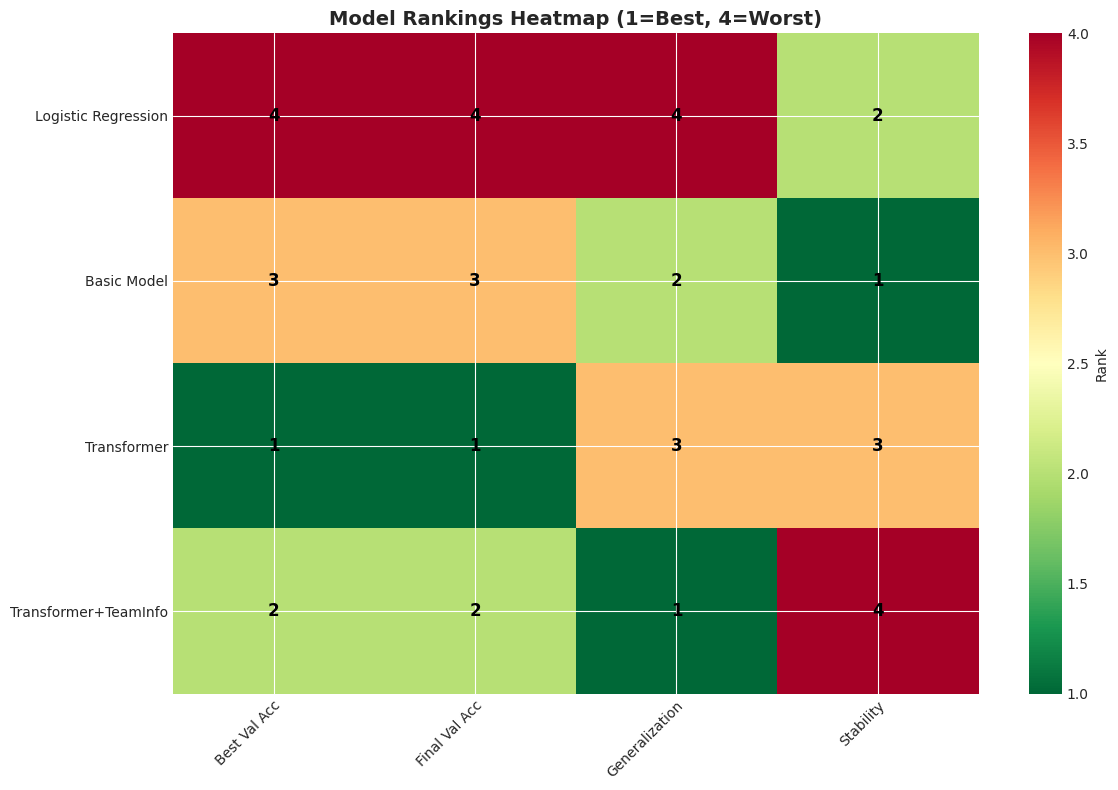

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

# Create ranking matrix
ranking_matrix = []
categories = ['Best Val Acc', 'Final Val Acc', 'Generalization', 'Stability']

for model in df_rank['Model']:
    ranks = []
    ranks.append(df_rank.sort_values('Best Val Acc', ascending=False)['Model'].tolist().index(model) + 1)
    ranks.append(df_rank.sort_values('Final Val Acc', ascending=False)['Model'].tolist().index(model) + 1)
    ranks.append(df_rank.sort_values('Overfit Gap', ascending=True)['Model'].tolist().index(model) + 1)
    ranks.append(df_rank.sort_values('Stability', ascending=True)['Model'].tolist().index(model) + 1)
    ranking_matrix.append(ranks)

ranking_matrix = np.array(ranking_matrix)

# Plot heatmap
im = ax.imshow(ranking_matrix, cmap='RdYlGn_r', aspect='auto', vmin=1, vmax=4)

ax.set_xticks(np.arange(len(categories)))
ax.set_yticks(np.arange(len(df_rank)))
ax.set_xticklabels(categories)
ax.set_yticklabels(df_rank['Model'])

# Rotate x labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Add text annotations
for i in range(len(df_rank)):
    for j in range(len(categories)):
        text = ax.text(j, i, int(ranking_matrix[i, j]), ha='center', va='center',
                      color='black', fontsize=12, fontweight='bold')

ax.set_title('Model Rankings Heatmap (1=Best, 4=Worst)', fontsize=14, fontweight='bold')
fig.colorbar(im, ax=ax, label='Rank')

plt.tight_layout()
plt.show()


## 11. Final Summary and Conclusions

Let's create a final summary of our findings.


In [28]:
print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

print("\n### Key Findings:")
print("\n1. BEST OVERALL PERFORMANCE")
best_model = df_rank.sort_values('Best Val Acc', ascending=False).iloc[0]
print(f"   Winner: {best_model['Model']}")
print(f"   Best Val Acc: {best_model['Best Val Acc']:.4f}")

print("\n2. BEST GENERALIZATION (Lowest Overfitting)")
best_gen = df_rank.sort_values('Overfit Gap', ascending=True).iloc[0]
print(f"   Winner: {best_gen['Model']}")
print(f"   Overfit Gap: {best_gen['Overfit Gap']:.4f}")

print("\n3. MOST STABLE TRAINING")
best_stab = df_rank.sort_values('Stability', ascending=True).iloc[0]
print(f"   Winner: {best_stab['Model']}")
print(f"   Stability Score: {best_stab['Stability']:.6f}")

print("\n4. FASTEST CONVERGENCE")
for name, df in data.items():
    epoch_60 = df[df['val_acc'] >= 0.60]['epoch'].values
    if len(epoch_60) > 0 and epoch_60[0] < 10:
        print(f"   Fastest: {name} (reached 60% accuracy at epoch {int(epoch_60[0])})")
        break

print("\n" + "="*80)
print("All analyses completed successfully!")
print("="*80)



FINAL SUMMARY

### Key Findings:

1. BEST OVERALL PERFORMANCE
   Winner: Transformer
   Best Val Acc: 0.6752

2. BEST GENERALIZATION (Lowest Overfitting)
   Winner: Transformer+TeamInfo
   Overfit Gap: -0.0082

3. MOST STABLE TRAINING
   Winner: Basic Model
   Stability Score: 0.000232

4. FASTEST CONVERGENCE
   Fastest: Logistic Regression (reached 60% accuracy at epoch 6)

All analyses completed successfully!


# Feature Anaysis
### The importance of each player slot and each feature

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

from model_transformer_with_teaminfo import NBAGamePredictionTransformerModelWithTeamInfo
from dataloader_with_teaminfo import NBAGameDataModuleWithTeamInfo

CHECKPOINT_PATH = "checkpoints/last-v2.ckpt"
PRECOMPUTED_DIR = "data/precomputed_features_with_teaminfo"


NUM_SAMPLES = 2000


BATCH_SIZE = 64

device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [2]:

datamodule = NBAGameDataModuleWithTeamInfo(
    precomputed_dir=PRECOMPUTED_DIR,
    batch_size=BATCH_SIZE,
    num_workers=0
)
datamodule.setup("fit")  
val_loader = datamodule.val_dataloader()

print("Validation batches:", len(val_loader))


if not os.path.exists(CHECKPOINT_PATH):
    raise FileNotFoundError(f"Checkpoint not found: {CHECKPOINT_PATH}")

model = NBAGamePredictionTransformerModelWithTeamInfo.load_from_checkpoint(
    CHECKPOINT_PATH,
    map_location=device,
)
model.to(device)

model.eval()
print("Model loaded!")



Loading pre-computed features from: data/precomputed_features_with_teaminfo

Dataset sizes:
  Training: 29286 games
  Validation: 3254 games
  Test: 1385 games

Feature dimensions:
  Player features: 240-dim (12 players × 20 features)
  Team info: 11-dim (home/away + win rate + 9 season stats)
Validation batches: 51
Model loaded!


/root/miniconda3/lib/python3.12/site-packages/lightning_fabric/utilities/cloud_io.py:73: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [5]:
import visualize,importlib
import numpy as np
importlib.reload(visualize)
importance = visualize.compute_player_slot_importance(
    model, val_loader,
    num_samples=NUM_SAMPLES,
    device=device
)

importance_normalized = importance / importance.sum()

importance_normalized


array([0.10983046, 0.1354722 , 0.14009201, 0.12136141, 0.12461827,
       0.1049563 , 0.06479612, 0.04243558, 0.03216785, 0.03271735,
       0.04069662, 0.05085582])

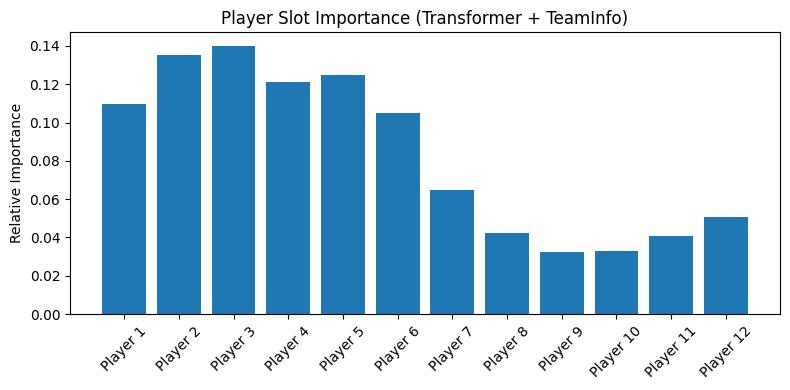

In [6]:
num_players = len(importance_normalized)
labels = [f"Player {i+1}" for i in range(num_players)]
x = np.arange(num_players)

plt.figure(figsize=(8,4))
plt.bar(x, importance_normalized)
plt.xticks(x, labels, rotation=45)
plt.ylabel("Relative Importance")
plt.title("Player Slot Importance (Transformer + TeamInfo)")
plt.tight_layout()
plt.show()

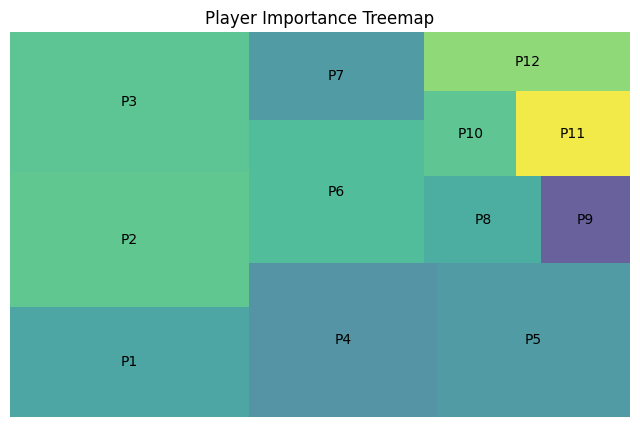

In [7]:
import squarify

plt.figure(figsize=(8,5))
squarify.plot(sizes=importance_normalized, 
              label=[f"P{i+1}" for i in range(12)], 
              alpha=0.8)
plt.title("Player Importance Treemap")
plt.axis("off")
plt.show()


Features meanings:
### Season averages (10 dimensions)
Season_PPG – Points per game<br>
Season_RPG – Rebounds per game<br>
Season_APG – Assists per game<br>
Season_SPG – Steals per game<br>
Season_BPG – Blocks per game<br>
Season_TOV – Turnovers per game<br>
Season_MPG – Minutes per game<br>
Season_FG% – Field goal percentage<br>
Season_3P% – Three-point percentage<br>
Season_FT% – Free-throw percentage<br>
### Recent 5-game rolling averages (10 dimensions)
Recent5_PPG – Average points over the last 5 games<br>
Recent5_RPG – Average rebounds over the last 5 games<br>
Recent5_APG – Average assists over the last 5 games<br>
Recent5_SPG – Average steals over the last 5 games<br>
Recent5_BPG – Average blocks over the last 5 games<br>
Recent5_TOV – Average turnovers over the last 5 games<br>
Recent5_MPG – Average minutes over the last 5 games<br>
Recent5_FG% – Field goal percentage over the last 5 games<br>
Recent5_3P% – Three-point percentage over the last 5 games<br>
Recent5_FT% – Free-throw percentage over the last 5 games<br>

now we will visualize their importance:

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from model_transformer_with_teaminfo import NBAGamePredictionTransformerModelWithTeamInfo
from dataloader_with_teaminfo import NBAGameDataModuleWithTeamInfo

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using:", device)

CHECKPOINT_PATH = "checkpoints/last-v2.ckpt"
PRECOMPUTED_DIR = "data/precomputed_features_with_teaminfo"
BATCH_SIZE = 64

# load datamodule
datamodule = NBAGameDataModuleWithTeamInfo(
    precomputed_dir=PRECOMPUTED_DIR,
    batch_size=BATCH_SIZE,
    num_workers=0
)
datamodule.setup("fit")
val_loader = datamodule.val_dataloader()

# load model
model = NBAGamePredictionTransformerModelWithTeamInfo.load_from_checkpoint(
    CHECKPOINT_PATH, map_location=device
)
model.to(device)
model.eval()


Using: cuda

Loading pre-computed features from: data/precomputed_features_with_teaminfo

Dataset sizes:
  Training: 29286 games
  Validation: 3254 games
  Test: 1385 games

Feature dimensions:
  Player features: 240-dim (12 players × 20 features)
  Team info: 11-dim (home/away + win rate + 9 season stats)


/root/miniconda3/lib/python3.12/site-packages/lightning_fabric/utilities/cloud_io.py:73: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


NBAGamePredictionTransformerModelWithTeamInfo(
  (team_encoder): TransformerTeamEncoderWithTeamInfo(
    (player_encoder): PlayerEncoder(
      (encoder): Sequential(
        (0): Linear(in_features=20, out_features=48, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.3, inplace=False)
        (3): Linear(in_features=48, out_features=32, bias=True)
        (4): ReLU()
      )
    )
    (positional_encoding): PositionalEncoding()
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-1): 2 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
          )
          (linear1): Linear(in_features=32, out_features=64, bias=True)
          (dropout): Dropout(p=0.3, inplace=False)
          (linear2): Linear(in_features=64, out_features=32, bias=True)
          (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
          (norm2): 

In [10]:
batch = next(iter(val_loader))
fi_slot1 = visualize.feature_importance_for_player_slot(model, batch, slot=0)

fi_slot1_norm = fi_slot1 / (fi_slot1.sum() + 1e-9)
fi_slot1_norm


array([0.21970579, 0.04743114, 0.09147288, 0.02444076, 0.03052073,
       0.05491674, 0.13572126, 0.00226242, 0.00694986, 0.00740221,
       0.07994662, 0.02606677, 0.02050742, 0.02426228, 0.00410303,
       0.02629772, 0.18681152, 0.002922  , 0.00586762, 0.00239121])

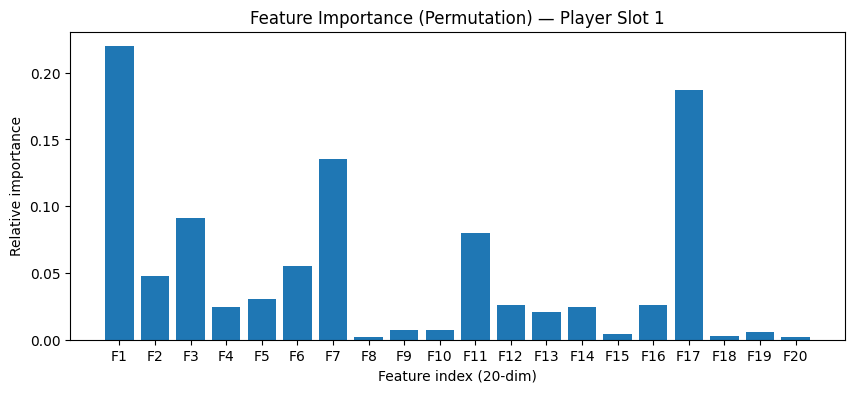

In [11]:
plt.figure(figsize=(10,4))
plt.bar(range(20), fi_slot1_norm)
plt.xticks(range(20), [f"F{i+1}" for i in range(20)])
plt.title("Feature Importance (Permutation) — Player Slot 1")
plt.xlabel("Feature index (20-dim)")
plt.ylabel("Relative importance")
plt.show()


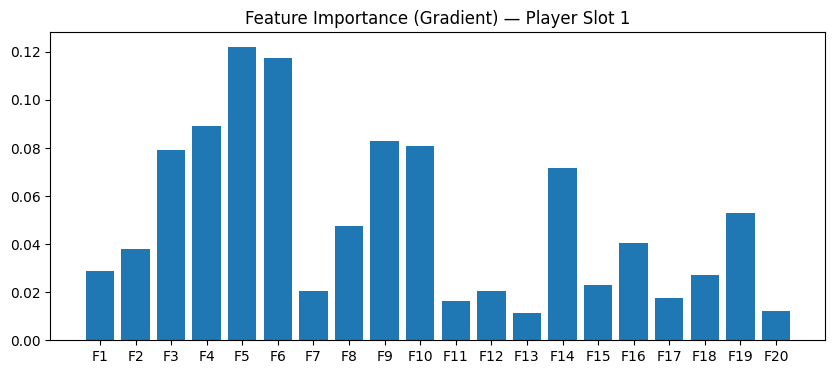

In [12]:
grad_imp = visualize.gradient_feature_importance(model, batch, slot=0)

plt.figure(figsize=(10,4))
plt.bar(range(20), grad_imp)
plt.xticks(range(20), [f"F{i+1}" for i in range(20)])
plt.title("Feature Importance (Gradient) — Player Slot 1")
plt.show()


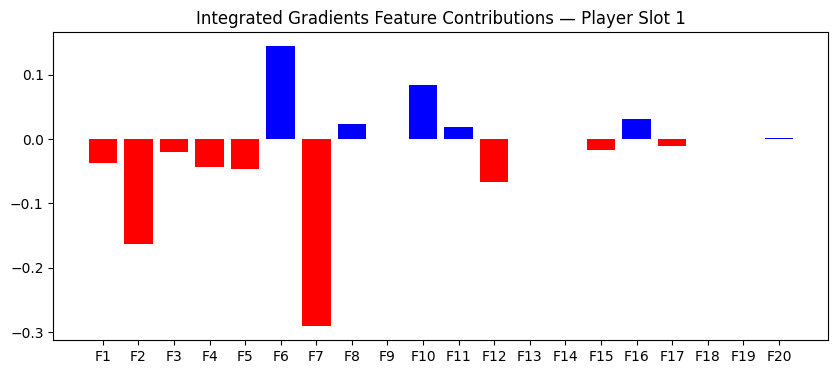

In [14]:
ig_vals = visualize.integrated_gradients(model, batch, slot=0)

plt.figure(figsize=(10,4))
plt.bar(range(20), ig_vals, color=["red" if v<0 else "blue" for v in ig_vals])
plt.xticks(range(20), [f"F{i+1}" for i in range(20)])
plt.title("Integrated Gradients Feature Contributions — Player Slot 1")
plt.show()


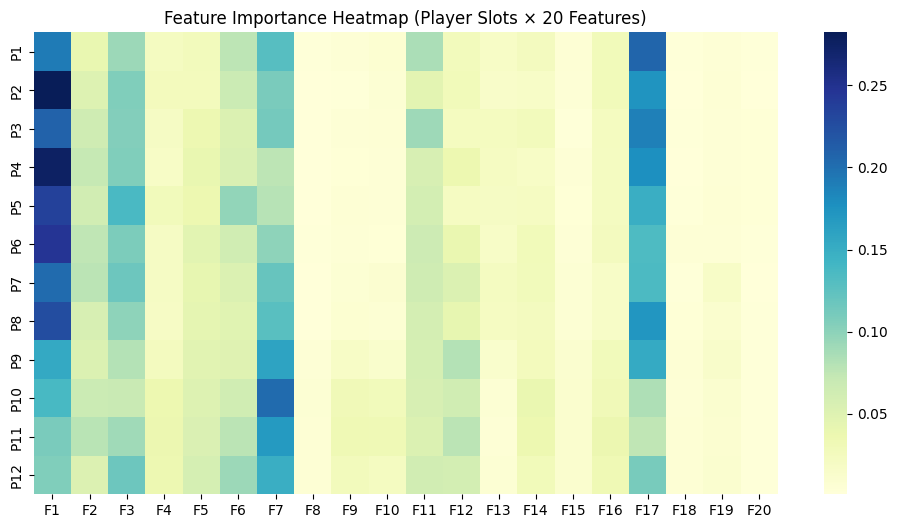

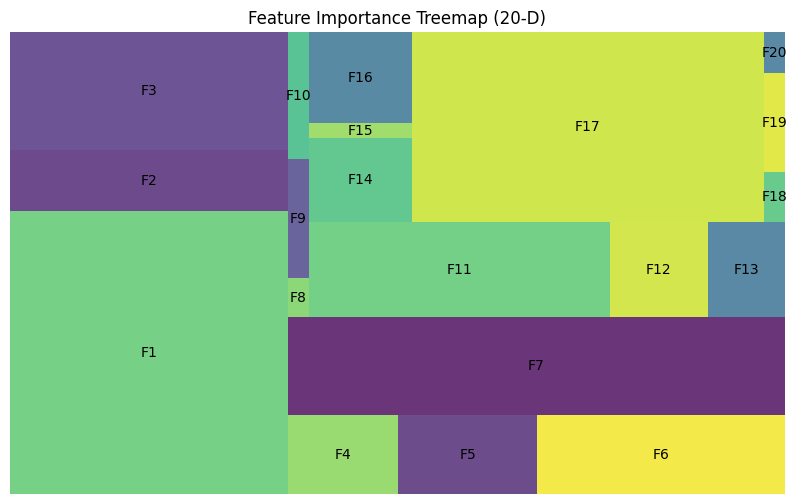

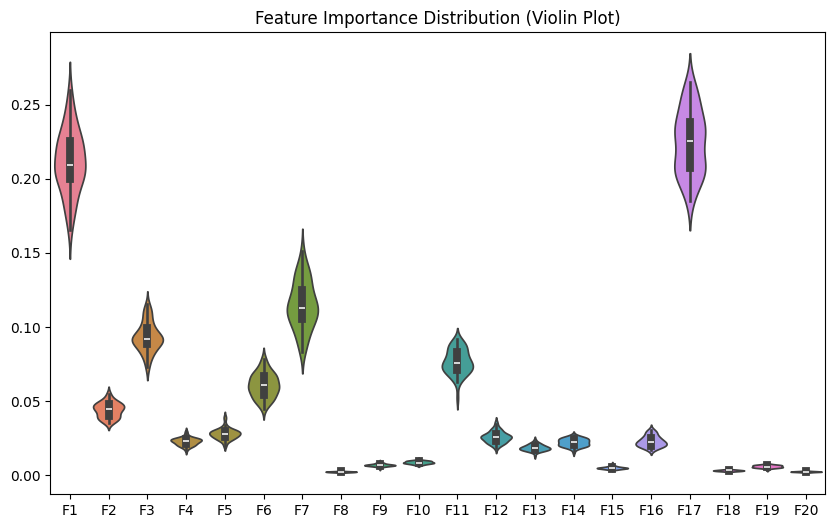

In [16]:
import seaborn as sns

importance_matrix = []  
for slot in range(12):
    imp = visualize.feature_importance_for_player_slot(model, batch, slot)
    importance_matrix.append(imp / imp.sum())

importance_matrix = np.stack(importance_matrix)

plt.figure(figsize=(12,6))
sns.heatmap(importance_matrix, cmap="YlGnBu",
            xticklabels=[f"F{i+1}" for i in range(20)],
            yticklabels=[f"P{i+1}" for i in range(12)])
plt.title("Feature Importance Heatmap (Player Slots × 20 Features)")
plt.show()
import squarify

plt.figure(figsize=(10,6))
squarify.plot(
    sizes=fi_slot1_norm,
    label=[f"F{i+1}" for i in range(20)],
    alpha=0.8
)
plt.title("Feature Importance Treemap (20-D)")
plt.axis("off")
plt.show()

import seaborn as sns

all_feature_imps = []  # shape = [num_games, 20]

for i in range(50):
    batch = next(iter(val_loader))
    fi = visualize.feature_importance_for_player_slot(model, batch, slot=0)
    all_feature_imps.append(fi / fi.sum())

plt.figure(figsize=(10,6))
sns.violinplot(data=np.array(all_feature_imps))
plt.xticks(range(20), [f"F{i+1}" for i in range(20)])
plt.title("Feature Importance Distribution (Violin Plot)")
plt.show()


# Players and Teams Analysis

Please run analyze_players_by_season.py and analyze_playoff_teams_tournament.py before running the following blocks (The visualizations are based on results they generate).

## Player-Season Importance Visualization

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

results_path = 'analysis_results/player_season_importance.csv'
df = pd.read_csv(results_path)

print("Loaded:", results_path)
df.head()

Loaded: analysis_results/player_season_importance.csv


,Player_Name,Season,Player_Season,Games_Analyzed,Mean_Signed_Impact,Std_Signed_Impact,Median_Signed_Impact,Positive_Games,Negative_Games,Positive_Rate
0,Luka Doncic,2023-2024,Luka Doncic (2023-2024),94,0.142091,0.100717,0.144119,88,6,0.936170
1,Tim Duncan,2006-2007,Tim Duncan (2006-2007),104,0.134939,0.092518,0.140014,96,8,0.923077
2,LaMarcus Aldridge,2017-2018,LaMarcus Aldridge (2017-2018),86,0.131490,0.087713,0.135927,81,5,0.941860
3,Shai Gilgeous-Alexander,2022-2023,Shai Gilgeous-Alexander (2022-2023),71,0.128442,0.104378,0.123339,65,6,0.915493
4,Chris Paul,2012-2013,Chris Paul (2012-2013),93,0.127908,0.115581,0.120982,78,15,0.838710


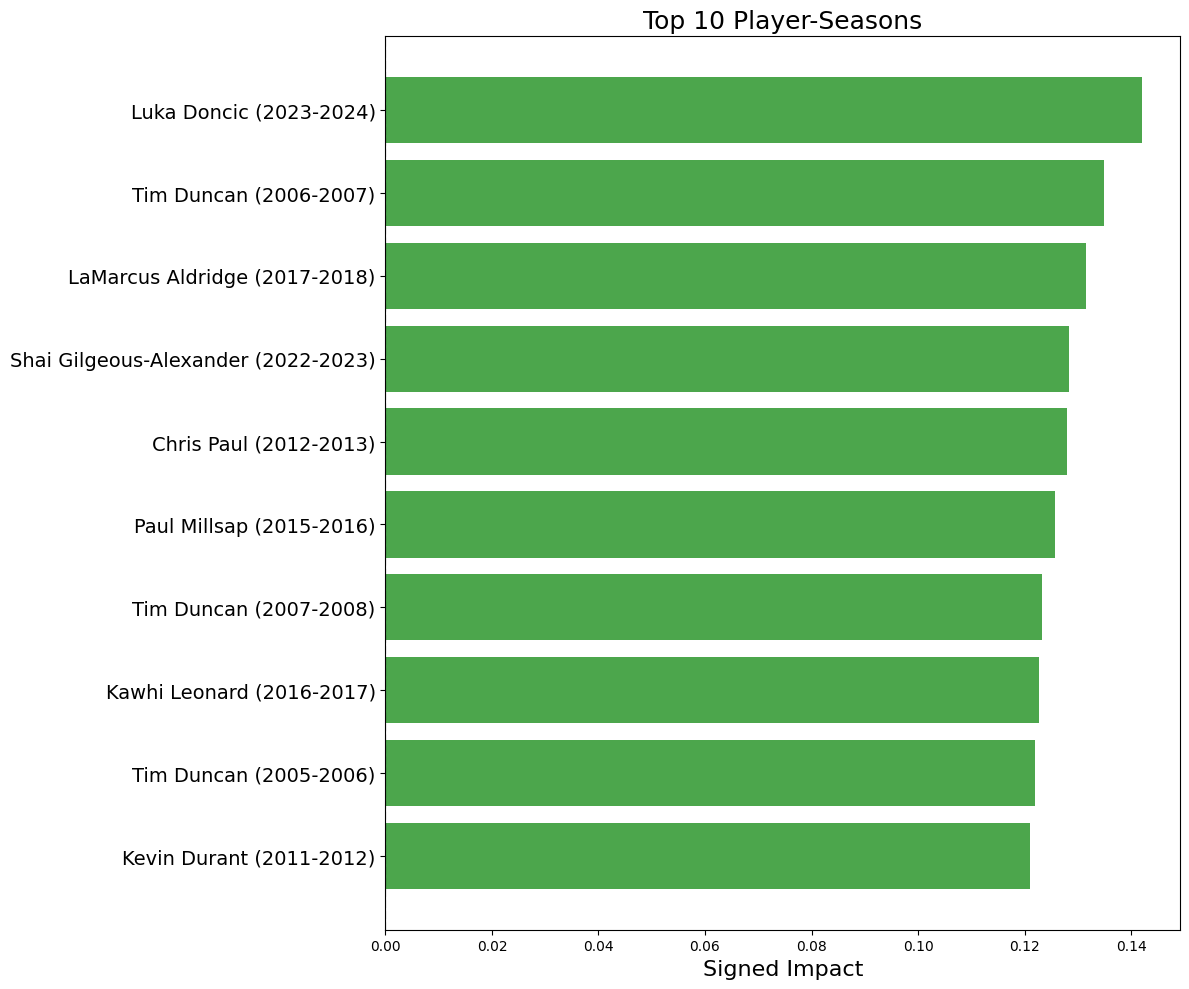

In [2]:

top_n = 10
top_players = df.head(top_n)

plt.figure(figsize=(12,10))
values = top_players['Mean_Signed_Impact'].values[::-1]
colors = ['green' if v > 0 else 'red' for v in values]

y_pos = range(top_n)
plt.barh(y_pos, values, color=colors, alpha=0.7)
plt.yticks(y_pos, top_players['Player_Season'].values[::-1], fontsize=14)
plt.xlabel('Signed Impact', fontsize=16)
plt.title(f'Top {top_n} Player-Seasons', fontsize=18)
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


## Top Teams Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = 'analysis_results/tournament_results.csv'
df = pd.read_csv(csv_path)
df.head()

,Rank,Team_Season,Season,Team_Name,Wins,Losses,Win_Rate,Games_Played,Playoff_Games,Key_Players
0,1,Warriors (2016-2017),2016-2017,Warriors,665.24260,49.757195,0.930409,715,24,"Kevin Durant, Stephen Curry, Klay Thompson, Dr..."
1,2,Lakers (2024-2025),2024-2025,Lakers,649.40080,65.599340,0.908253,715,13,"Luka Doncic, LeBron James, Austin Reaves, Rui ..."
2,3,Clippers (2014-2015),2014-2015,Clippers,645.02673,69.973510,0.902135,715,22,"Blake Griffin, JJ Redick, DeAndre Jordan, Chri..."
3,4,Warriors (2015-2016),2015-2016,Warriors,643.16620,71.833980,0.899533,715,31,"Klay Thompson, Stephen Curry, Andre Iguodala, ..."
4,5,Hornets (2021-2022),2021-2022,Hornets,637.72870,77.271300,0.891928,715,6,"LaMelo Ball, P.J. Washington, Terry Rozier, Mi..."


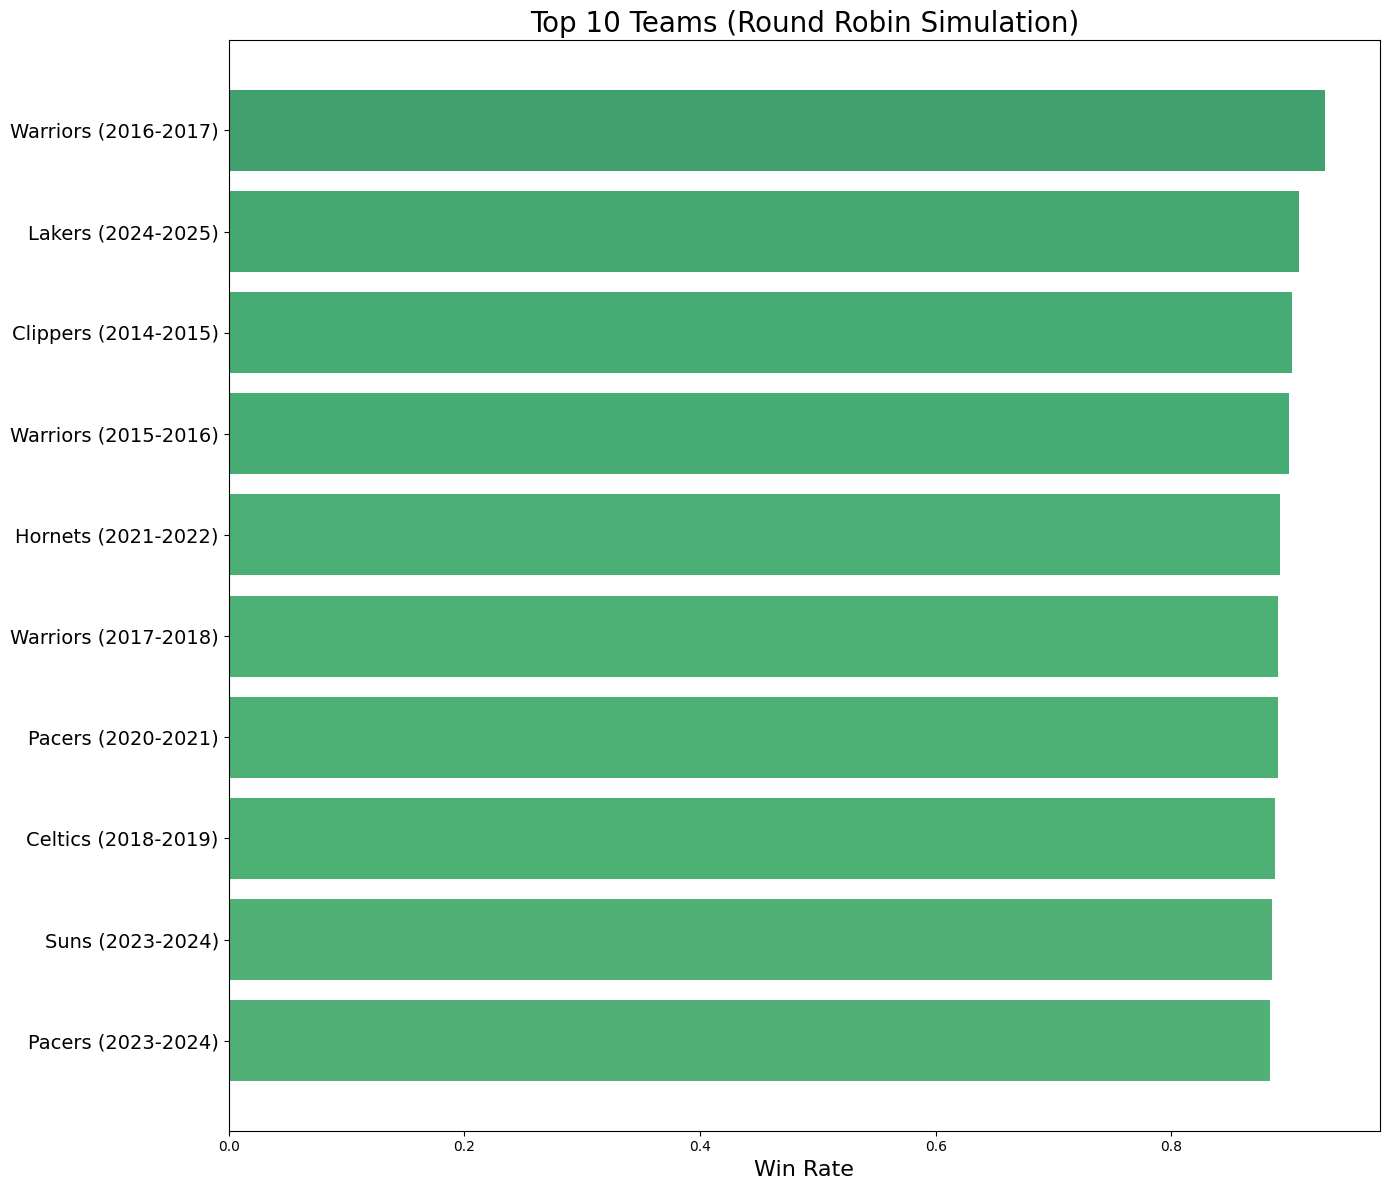

In [4]:


top_n = 10
top_df = df.head(top_n)

plt.figure(figsize=(14,12))
values = top_df['Win_Rate'].values[::-1]
colors = plt.cm.RdYlGn(values)

y_pos = range(top_n)
plt.barh(y_pos, values, color=colors, alpha=0.8)

plt.yticks(y_pos, top_df['Team_Season'].values[::-1], fontsize=14)
plt.xlabel('Win Rate', fontsize=16)
plt.title(f'Top {top_n} Teams (Round Robin Simulation)', fontsize=20)

plt.tight_layout()
plt.show()
